In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
import random
import soundfile as sf
import numpy as np

In [20]:
bonafide_audio_dir = '/nas/home/cborrelli/bot_speech/notebook/audio/bonafide'
bonafide_audio_files = os.listdir(bonafide_audio_dir)
bonafide_audio_file = bonafide_audio_files[random.randint(0, len(bonafide_audio_files))]
bonafide_data, samplerate = sf.read(os.path.join(bonafide_audio_dir,bonafide_audio_file))                                            


In [14]:
import IPython.display as ipd
ipd.Audio(bonafide_data, rate=samplerate)

In [21]:
spoof_audio_dir = '/nas/home/cborrelli/bot_speech/notebook/audio/spoof'
spoof_audio_files = os.listdir(spoof_audio_dir)
spoof_audio_file = spoof_audio_files[random.randint(0, len(spoof_audio_files))]
spoof_data, samplerate = sf.read(os.path.join(spoof_audio_dir,spoof_audio_file))               

In [16]:
import IPython.display as ipd
ipd.Audio(spoof_data, rate=samplerate)

In [17]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(bonafide_data)), ref=np.max)
magnitude, phase = librosa.magphase(D)
phase

array([[-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j],
       [-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j],
       [-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j],
       ...,
       [-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j],
       [-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j],
       [-1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j, ...,
        -1.-8.742278e-08j, -1.-8.742278e-08j, -1.-8.742278e-08j]],
      dtype=complex64)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

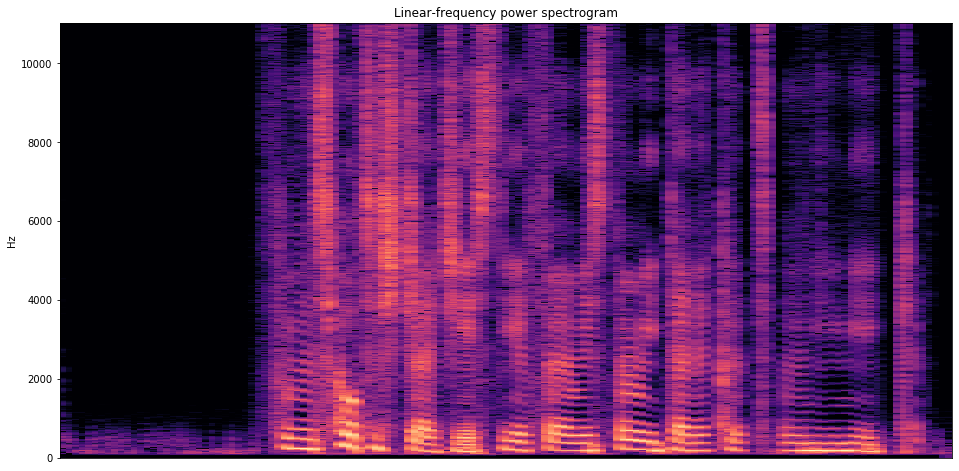

In [22]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(spoof_data)), ref=np.max)
plt.figure(figsize=(16,8))
librosa.display.specshow(D, y_axis='linear')
plt.title('Linear-frequency power spectrogram')

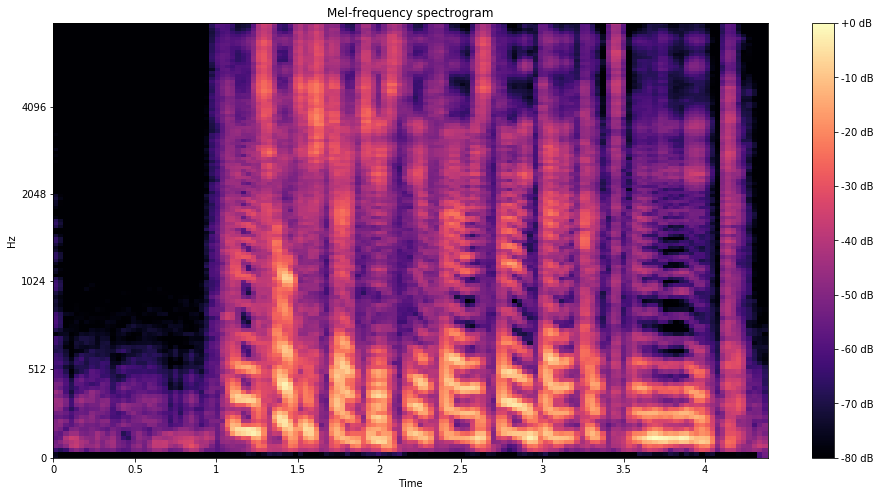

In [23]:
plt.figure(figsize=(16, 8))
S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=spoof_data, sr=samplerate), ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=samplerate, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()

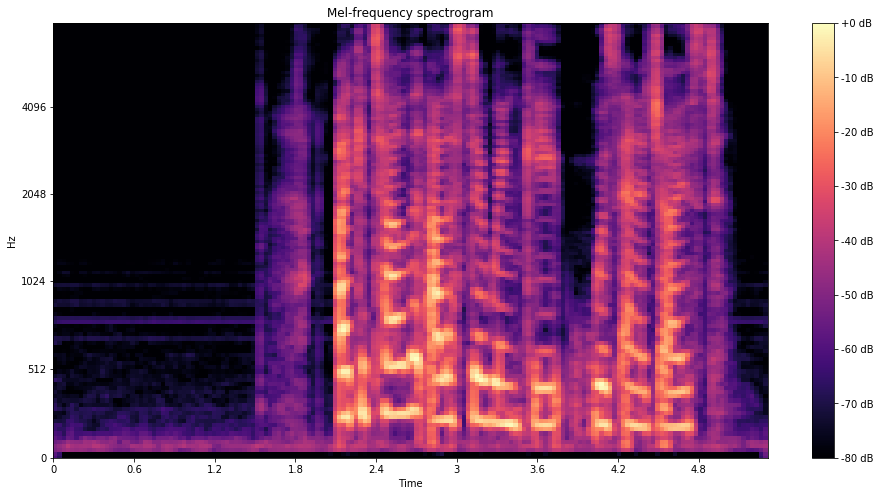

In [10]:
plt.figure(figsize=(16, 8))
S_dB = librosa.power_to_db(librosa.feature.melspectrogram(y=bonafide_data, sr=samplerate), ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=samplerate, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.show()